In [234]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

from model.Portfolio import Portfolio
from model.Optimizer import Optimizer
plt.rcParams["figure.figsize"] = 10, 15

In [235]:
names = ["C38U", "ND8U", "V01", "AGS", "N2IU", "IAU", "A35"]

p = Portfolio()

# Set risk-free investment as 2%, approximately SSB's returns
p.rf = 0.02

# Add all assets
for name in names:
    p.addAsset(f"data/{name}.csv", name)

# Convert non SGD assets to SGD
p.addExchangeRate("data/forex/SGDEUR.csv", "EUR", True)
p.addExchangeRate("data/forex/USDSGD.csv", "USD", False)
p.exchangeAdjustment(5, "USD")

In [236]:
currentWeight = [20, 20, 20, 10, 10, 5, 10]

normalisedWeight = np.array(currentWeight)/np.sum(currentWeight)
normalisedWeight

array([0.21052632, 0.21052632, 0.21052632, 0.10526316, 0.10526316,
       0.05263158, 0.10526316])

In [237]:
currentResult, currentBtPlot = p.backtest(normalisedWeight, rebalancePeriod=90)

In [238]:
currentResult

{'dateStart': Timestamp('2011-04-27 00:00:00'),
 'dateEnd': Timestamp('2019-06-13 00:00:00'),
 'days': 2969,
 'valueStart': 100000.0,
 'valueEnd': 261124.04918525205,
 'sharpe': 0.7213529829889567,
 'drawdown': 0.0,
 'drawdownPeriod': 0,
 'moneydown': 0.0,
 'maxDrawdown': 12.915734645141185,
 'maxDrawdownPeriod': 333,
 'maxMoneydown': 24527.019089199952,
 'averageReturns': 0.12030496795253631,
 'standardDeviation': 0.1390511584729551,
 'positiveYears': 8,
 'negativeYears': 1,
 'noChangeYears': 0,
 'bestYearReturns': 0.4651668134586362,
 'worstYearReturns': -0.004412854036874414}

<IPython.core.display.Javascript object>


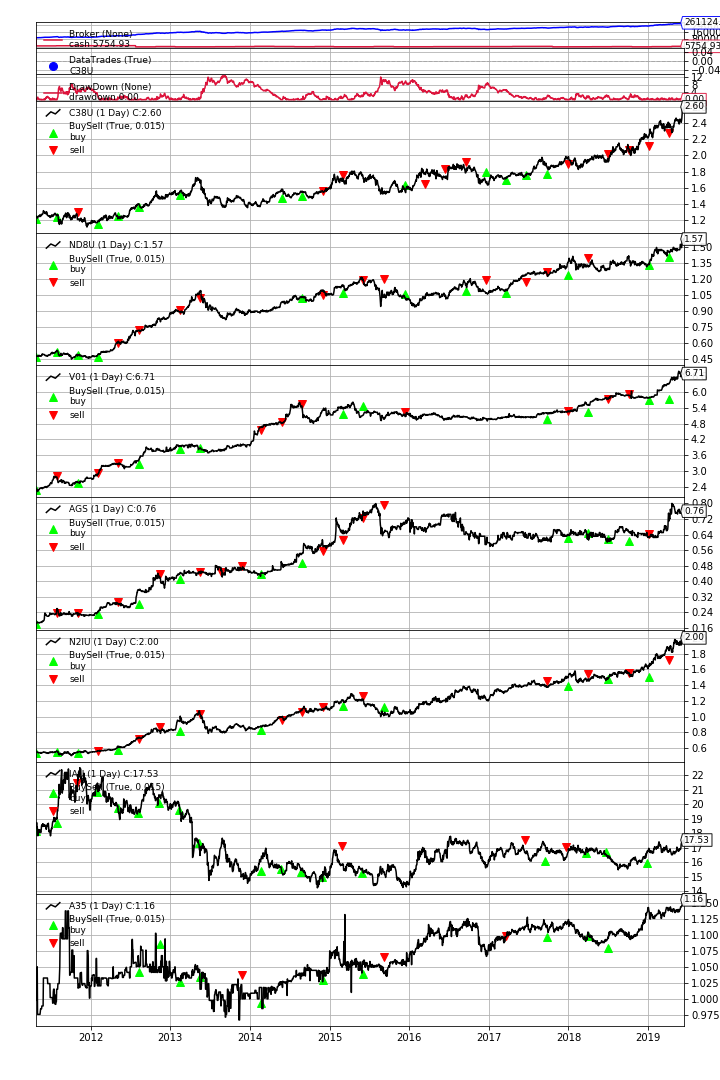

[[<Figure size 720x1080 with 10 Axes>]]

In [248]:
currentBtPlot()

In [241]:
o = Optimizer(p)
optimisedWeight, tests = o.kfoldTs(10)

In [242]:
optimisedWeight

[0.02769572262557185,
 0.12695002229786073,
 0.3547548975557813,
 0.11146797508382714,
 0.13921878702468876,
 0.09391547853196361,
 0.14599711688030675]

In [243]:
tests

{'sharpeRaw': [56.28084041405075,
  -2.8249720872919992,
  23.658659508558845,
  23.162983630822296,
  -1.1111995602537308,
  8.073864966666417,
  -7.846711922344368,
  30.420229341204152,
  19.71918771949131,
  50.241555044402425],
 'sharpeAvg': 19.97744370553061,
 'sharpeStd': 20.60880975232605,
 'weightsRaw': [array([0.        , 0.01830861, 0.4009047 , 0.13946062, 0.13376749,
         0.18532835, 0.12223023]),
  array([0.0321422 , 0.13762312, 0.29927462, 0.09358525, 0.2085158 ,
         0.11098086, 0.11787815]),
  array([0.01548799, 0.18637709, 0.35425151, 0.1296892 , 0.1108413 ,
         0.06900689, 0.13434602]),
  array([0.02486884, 0.14277611, 0.4088967 , 0.10710077, 0.11763255,
         0.06719898, 0.13152605]),
  array([0.02827281, 0.15650353, 0.34156458, 0.11024876, 0.14498616,
         0.07086833, 0.14755583]),
  array([0.03369337, 0.13774154, 0.35270583, 0.12110256, 0.13060289,
         0.08296998, 0.14118382]),
  array([0.04537356, 0.10723374, 0.32830738, 0.12837688, 0.1349

In [244]:
optimisedResult, optimisedBtPlot = p.backtest(optimisedWeight, rebalancePeriod=90)

In [245]:
optimisedResult

{'dateStart': Timestamp('2011-04-27 00:00:00'),
 'dateEnd': Timestamp('2019-06-13 00:00:00'),
 'days': 2969,
 'valueStart': 100000.0,
 'valueEnd': 256124.86098497562,
 'sharpe': 0.7829149635566601,
 'drawdown': 0.1200548795895408,
 'drawdownPeriod': 3,
 'moneydown': 307.8599943999725,
 'maxDrawdown': 10.135769588754249,
 'maxDrawdownPeriod': 586,
 'maxMoneydown': 20837.341287800024,
 'averageReturns': 0.11638400094725693,
 'standardDeviation': 0.12310915672041763,
 'positiveYears': 8,
 'negativeYears': 1,
 'noChangeYears': 0,
 'bestYearReturns': 0.41164445515905057,
 'worstYearReturns': -0.0002921351694950003}

<IPython.core.display.Javascript object>


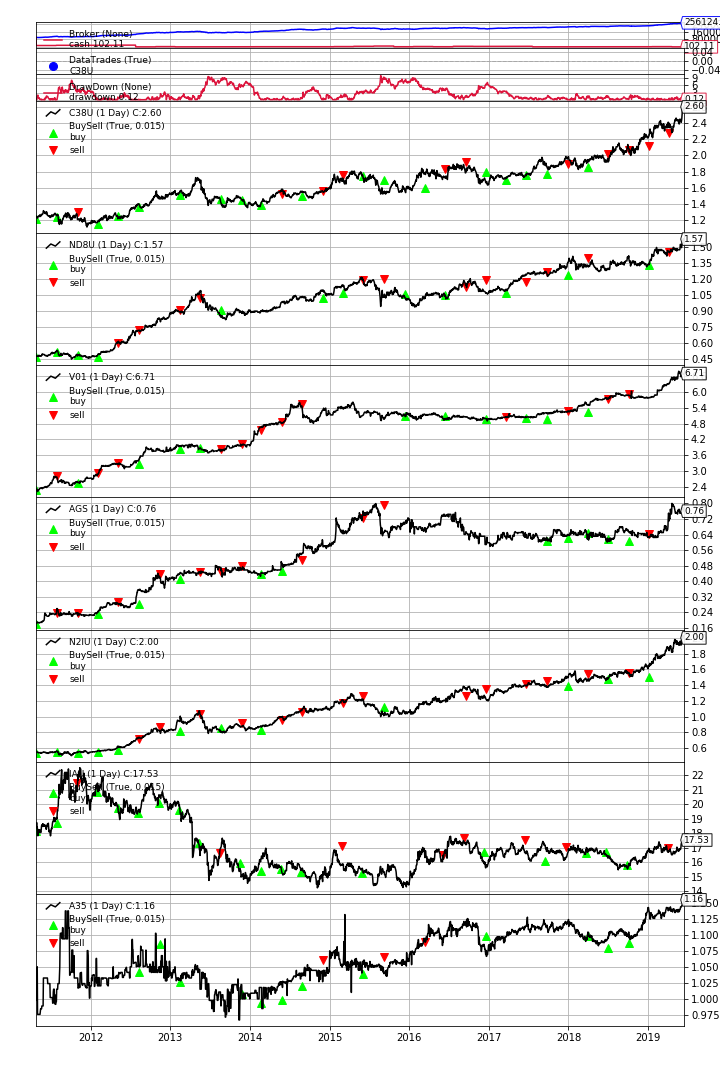

[[<Figure size 720x1080 with 10 Axes>]]

In [246]:
optimisedBtPlot()

In [247]:
dict(zip(names, np.array(optimisedWeight)*100))

{'C38U': 2.769572262557185,
 'ND8U': 12.695002229786073,
 'V01': 35.47548975557813,
 'AGS': 11.146797508382713,
 'N2IU': 13.921878702468875,
 'IAU': 9.39154785319636,
 'A35': 14.599711688030675}